In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

csv_path = r"C:\Users\koche\Downloads\Telegram Desktop\Netflix Dataset (7).csv"
df = pd.read_csv(csv_path)
print("Rows, Columns:", df.shape)
df.head()


Rows, Columns: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [18]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year_Added'] = df['Release_Date'].dt.year
df['Minutes'] = df['Duration'].apply(
    lambda x: float(str(x).split('min')[0].strip()) if isinstance(x, str) and 'min' in x else np.nan
)
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year_Added,Minutes
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,NaN
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,78.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,80.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123.0


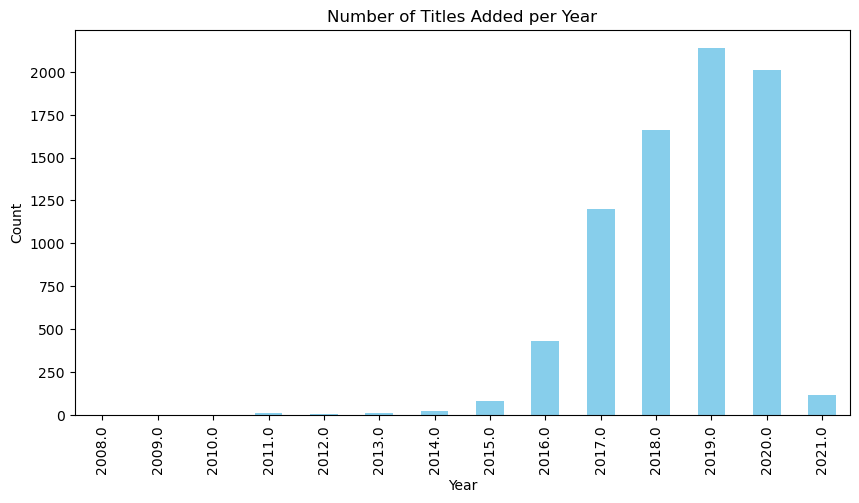

In [19]:
added_per_year = df['Year_Added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
added_per_year.plot(kind='bar', color='skyblue')
plt.title("Number of Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


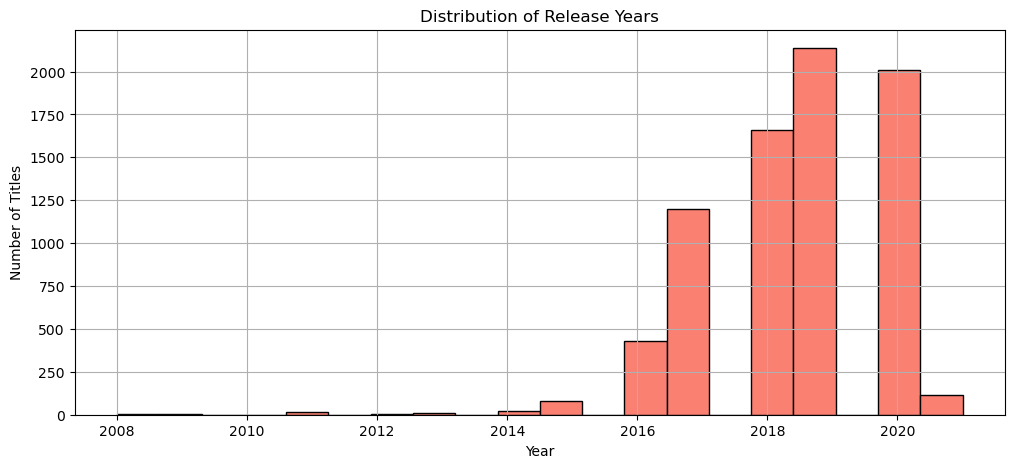

In [20]:
plt.figure(figsize=(12,5))
df['Year_Added'].dropna().astype(int).hist(bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Release Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


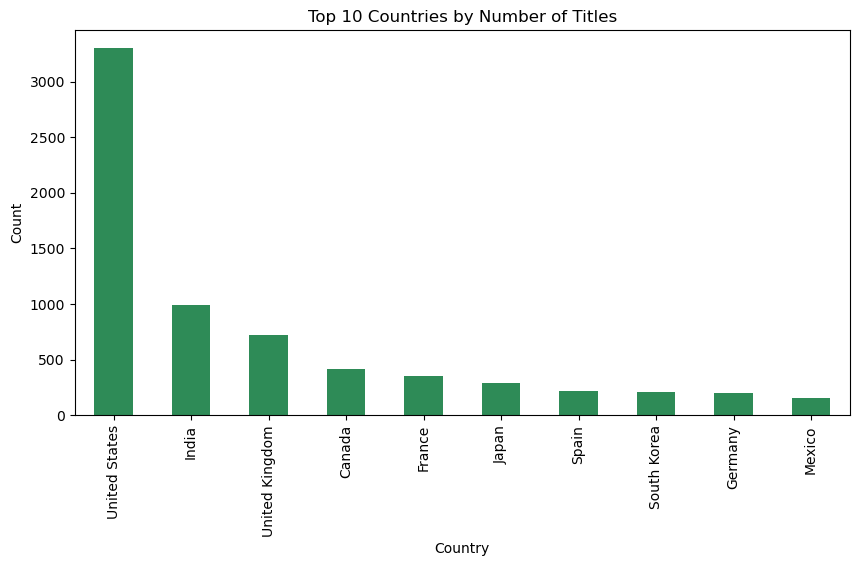

In [21]:
country_counts = df['Country'].dropna().str.split(',', expand=True).stack().str.strip().value_counts()
plt.figure(figsize=(10,5))
country_counts.head(10).plot(kind='bar', color='seagreen')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


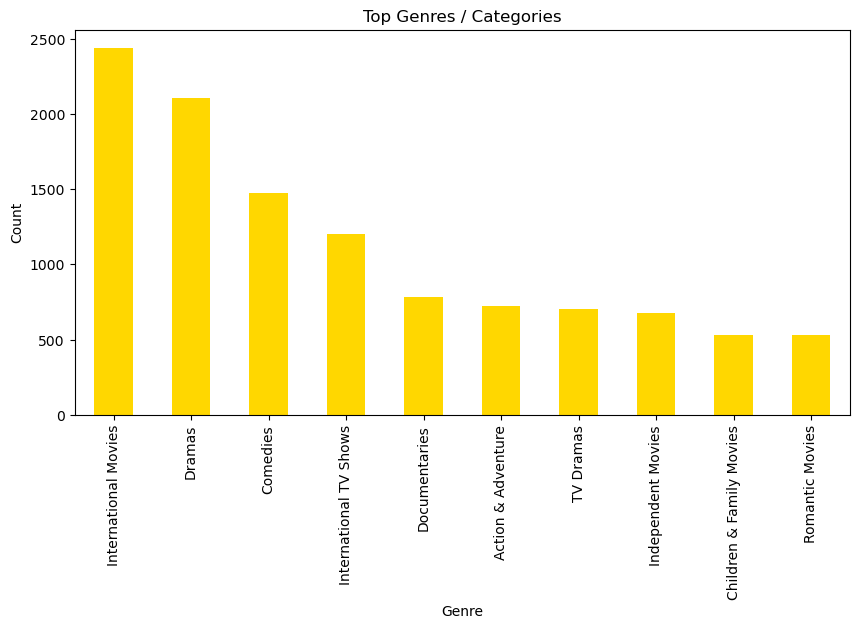

In [22]:
genres = df['Type'].dropna().str.split(',', expand=True).stack().str.strip().value_counts()
plt.figure(figsize=(10,5))
genres.head(10).plot(kind='bar', color='gold')
plt.title("Top Genres / Categories")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()
